In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

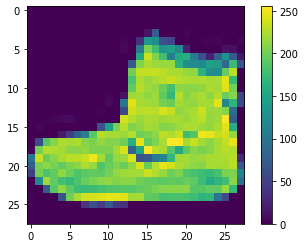

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

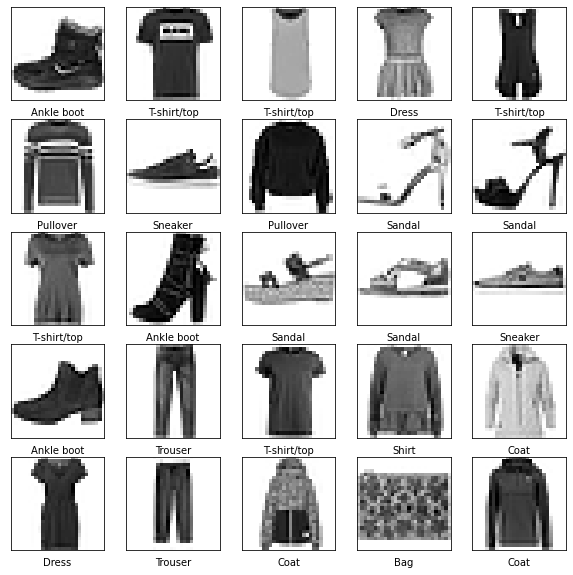

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
train_images[0].min(), train_images[0].max()

(0.0, 1.0)

In [18]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [20]:
train_labels[0]

9

In [21]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
   1/1875 [..............................] - ETA: 4:27 - loss: 2.4287 - accuracy: 0.0938

2022-07-13 11:51:53.182921: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 735us/step - loss: 0.4807 - accuracy: 0.8305
Epoch 2/10
1875/1875 [==============================] - 1s 727us/step - loss: 0.3610 - accuracy: 0.8685
Epoch 3/10
1875/1875 [==============================] - 1s 719us/step - loss: 0.3221 - accuracy: 0.8814
Epoch 4/10
1875/1875 [==============================] - 1s 732us/step - loss: 0.3022 - accuracy: 0.8884
Epoch 5/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.2820 - accuracy: 0.8953
Epoch 6/10
1875/1875 [==============================] - 1s 744us/step - loss: 0.2677 - accuracy: 0.9006
Epoch 7/10
1875/1875 [==============================] - 1s 729us/step - loss: 0.2548 - accuracy: 0.9051
Epoch 8/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.2444 - accuracy: 0.9097
Epoch 9/10
1875/1875 [==============================] - 1s 709us/step - loss: 0.2345 - accuracy: 0.9116
Epoch 10/10
1875/1875 [==============================] - 1s 704us/step - lo

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3486 - accuracy: 0.8834 - 186ms/epoch - 593us/step

Test accuracy: 0.883400022983551


In [24]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [25]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 368us/step


In [26]:
predictions[0]

array([2.4927376e-08, 9.5726996e-11, 2.0694857e-09, 4.9134158e-10,
       1.1551737e-08, 3.9217673e-04, 6.4766823e-07, 3.5531067e-03,
       2.5912261e-08, 9.9605405e-01], dtype=float32)

In [27]:
len(predictions[0])

10

In [29]:
predictions[0].sum()

1.0

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(
    class_names[predicted_label],
    100 * np.max(predictions_array),
    class_names[true_label],
  ), color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

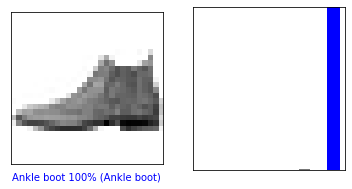

In [36]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

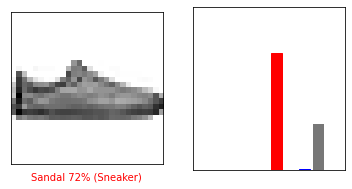

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

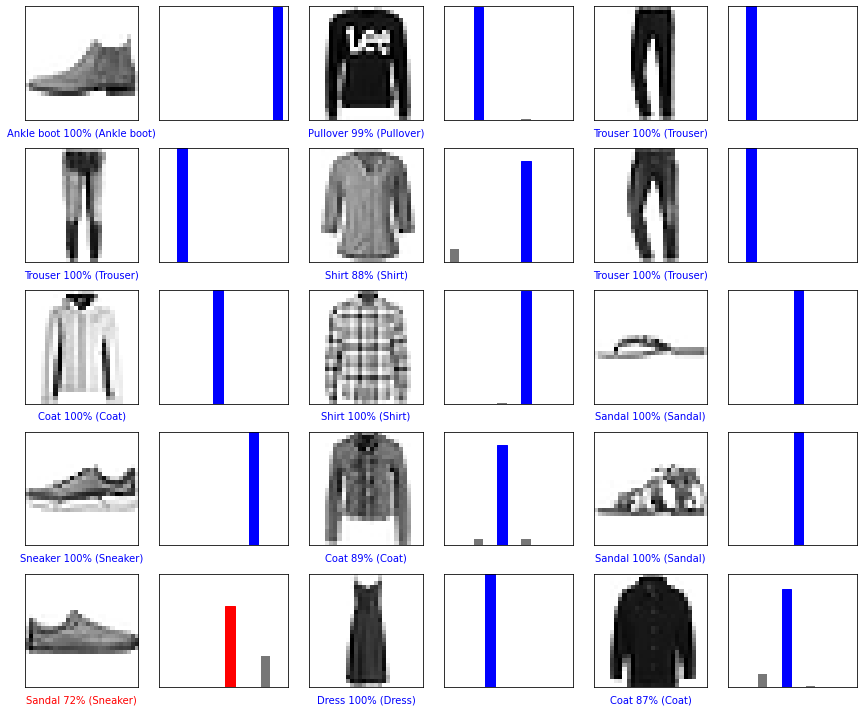

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [40]:
img = test_images[1]

print(img.shape)

(28, 28)


In [41]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [42]:
prediction = probability_model.predict(img)

1/1 [==============================] - 0s 8ms/step


In [43]:
print(prediction)

[[1.8328539e-04 2.9825071e-13 9.9204892e-01 6.3300063e-09 1.7322482e-03
  4.9450763e-14 6.0356124e-03 6.6036065e-16 5.0929472e-11 7.8299281e-13]]


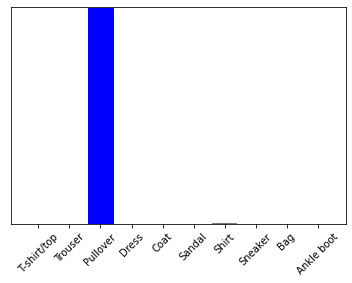

In [44]:
plot_value_array(1, prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [45]:
np.argmax(prediction[0])

2